# Sales Channel Prediction Case Study  

Problem Statement:

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import joblib

In [2]:
df=pd.read_csv("advertising.csv")

In [3]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In this we can see that as per our problem statement "sales" column is our continuous target variable hence we will use regression analysis to predict the values.

The other columns become our independant variables. We can see that "Unnamed: 0" column is just a serial number for the different values. Hence we can remove it.

In [5]:
df.head(3)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3


In [6]:
df.sample(3)

,Unnamed: 0,TV,radio,newspaper,sales
80,81,76.4,26.7,22.3,11.8
49,50,66.9,11.7,36.8,9.7
115,116,75.1,35.0,52.7,12.6


In [7]:
df.tail(3)

,Unnamed: 0,TV,radio,newspaper,sales
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [8]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [9]:
df.shape

(200, 5)

In [10]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


the 3 independant variables are in float data type.

# Exploratory Data Analysis (EDA)

### checking for missing values

In [4]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

<AxesSubplot:>

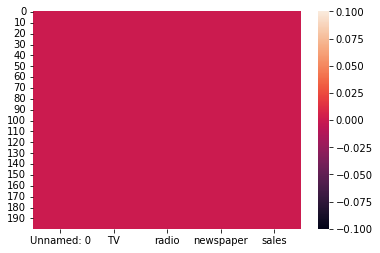

In [12]:
sns.heatmap(df.isnull())

Observations :

-There is no missing data in the data set

## Statistical Summary

In [24]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


observations:
    
We can see that "Unnamed: 0" column is just a serial number for the different values. Hence we can remove it.

we can see that the "TV" and "radio" have reasonable differences between their quantiles and only "newspaper" column has a huge difference between 75% and max value indicating outliers.

## dropping a column

In [25]:
df = df.drop("Unnamed: 0",axis=1)

In [26]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


we have dropped "Unnamed: 0" column.

## Data Visualization

### Scatter plot:

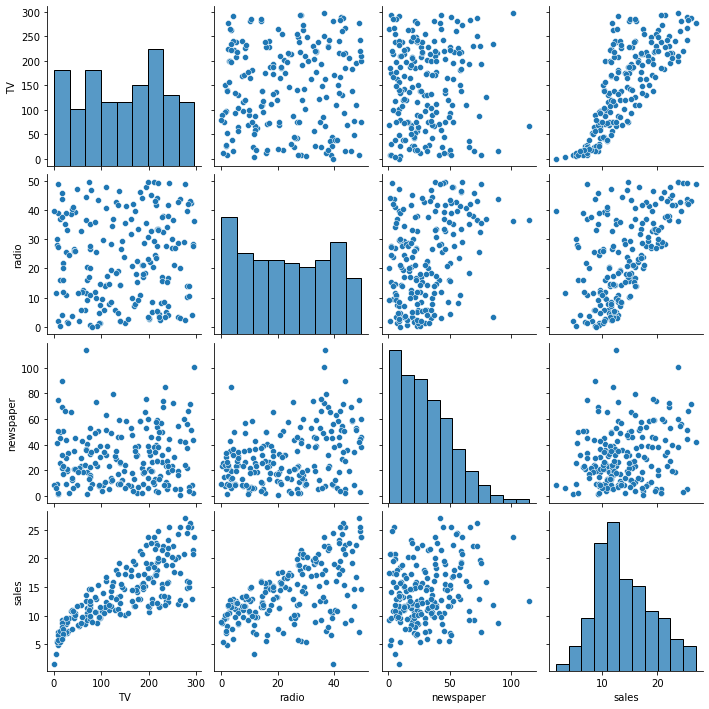

In [27]:
sns.pairplot(df)

<AxesSubplot:xlabel='sales', ylabel='TV'>

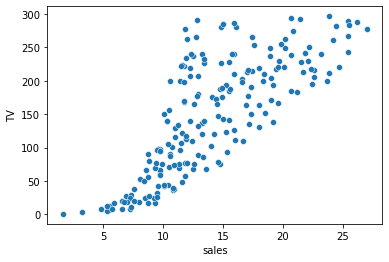

In [28]:
sns.scatterplot(x='sales',y='TV',data=df)

<AxesSubplot:xlabel='sales', ylabel='radio'>

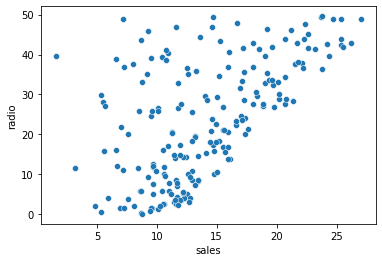

In [29]:
sns.scatterplot(x='sales',y='radio',data=df)

<AxesSubplot:xlabel='sales', ylabel='newspaper'>

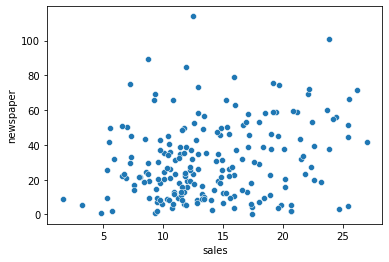

In [30]:
sns.scatterplot(x='sales',y='newspaper',data=df)

Observations:
    
From the above scatter plot we can see that the "TV" and "radio" columns have a positive linear relationship with sales.

whereas in newspaper column the relationship is scattered although as sales increase the newspaper value increases too but no exact linear relationship

### Relational Plots

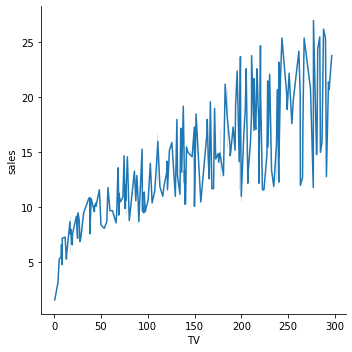

In [33]:
sns.relplot(x="TV",y="sales",kind="line",data=df)

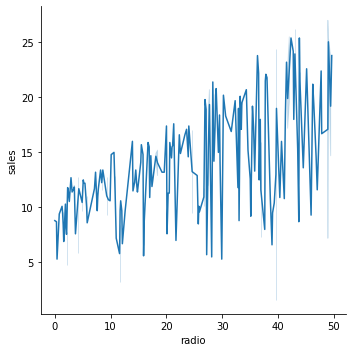

In [34]:
sns.relplot(x="radio",y="sales",kind="line",data=df)

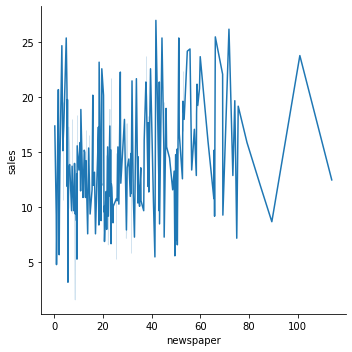

In [35]:
sns.relplot(x="newspaper",y="sales",kind="line",data=df)

Observations:
    
From the above relational plots we can see that:

TV vs sales has a positive pattern hence it gives a dominant role in the sales.

radio vs sales is contributing towards sales but is not dominating.

newspaper vs sales we can see a random trend and also looks like it has outliers

## Correlation check:

In [36]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

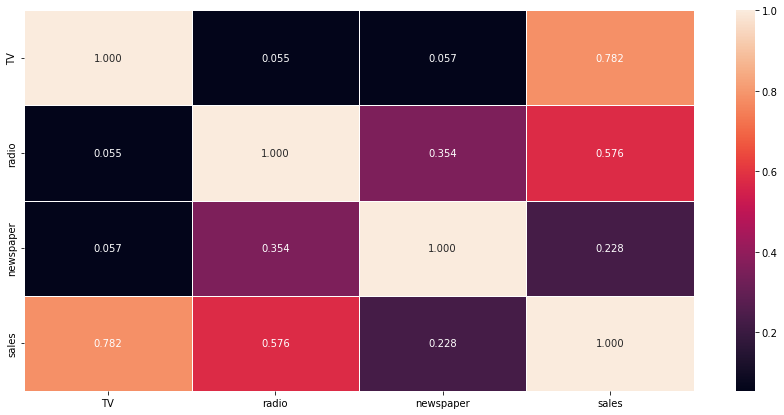

In [40]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt='.3f')

In [41]:
df.corr().sales.sort_values()

newspaper    0.228299
radio        0.576223
TV           0.782224
sales        1.000000
Name: sales, dtype: float64

Observations:
    
From the above we can see that there are no negative correlation present in between our independant and target variables.

TV has the highest correlation with sales and newspaper has the lowest correlation.

## Checking Outliers

In [42]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

TV              AxesSubplot(0.125,0.125;0.168478x0.755)
radio        AxesSubplot(0.327174,0.125;0.168478x0.755)
newspaper    AxesSubplot(0.529348,0.125;0.168478x0.755)
sales        AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

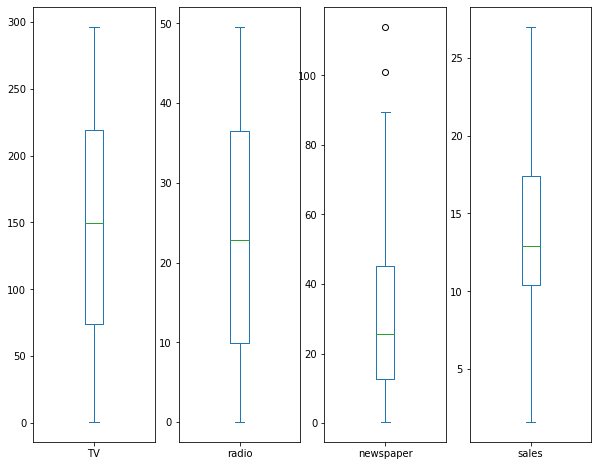

In [45]:
df.plot(kind='box',subplots=True,layout=(1,4),figsize=(10,8))

Observations:
    
From the above boxplots we can see that only the newspaper column has outliers

## Skewness Checking

In [46]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

<AxesSubplot:xlabel='TV', ylabel='Density'>

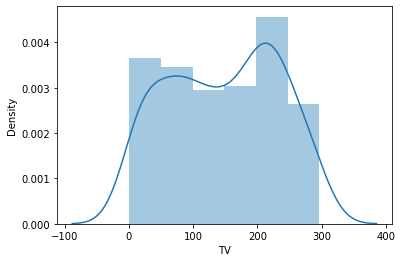

In [47]:
sns.distplot(df['TV'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

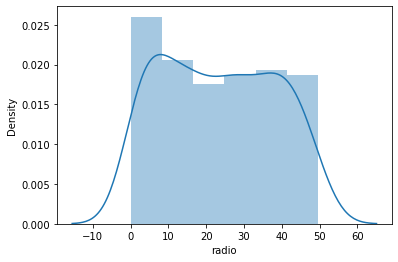

In [48]:
sns.distplot(df['radio'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

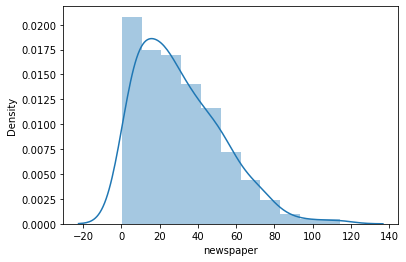

In [49]:
sns.distplot(df['newspaper'])

<AxesSubplot:xlabel='sales', ylabel='Density'>

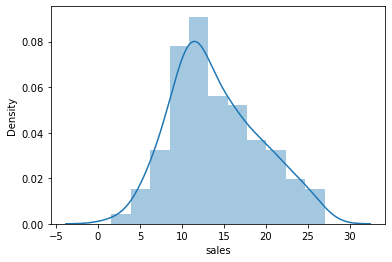

In [50]:
sns.distplot(df['sales'])

In [51]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

Observations:
    
Looking at the above distribution plots we can see that 'TV', 'radio' and 'sales' have almost bell shaped curve

only 'newspaper' column has visible skewness

the skewness threshold is +/-0.5 hence the newspaper column is the only one column outside the threshold.

# Data Preprocessing

### Removing Outliers:

In [96]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,1.197376,1.082808,0.669579,0.696046
2,1.516155,1.528463,1.783549,0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,0.841614,1.281802,0.215683
...,...,...,...,...
195,1.270941,1.321031,0.771217,1.234053
196,0.617035,1.240003,1.033598,0.830548
197,0.349810,0.942899,1.111852,0.234898
198,1.594565,1.265121,1.640850,2.205347


In [97]:
threshold = 3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [98]:
#row and column
z.iloc[16,2]

3.8411707150992718

In [99]:
z.iloc[101,2]

3.238153957342154

In [100]:
z.shape

(200, 4)

In [101]:
len(np.where(z>3)[0])

2

In [102]:
# removing outliers
df_new=df[(z<3).all(axis=1)]
print("Old Dataframe",df.shape)
print("New Dataframe",df_new.shape)
print("total_dropped_rows",df.shape[0] - df_new.shape[0])

Old Dataframe (200, 4)
New Dataframe (198, 4)
total_dropped_rows 2


We used Z score method to get rid of outliers present in our dataset that are not in the acceptable range of +/-3 zscore value

### Percentage data loss:

In [103]:
loss_percent=(200-198)/200*100
print(loss_percent,'%')

1.0 %


After removing the outliers we are checking the data loss percentage by comparing the rows in our original data set and the new data set

1.0% data loss is acceptable

### df_new is the new data set after 1 column is removed and all the outliers (with z<3 z score) are removed

# Splitting the dataset into Features and Target

In [104]:
X = df_new.iloc[:,:-1]         #capital X 
y = df_new.iloc[:,-1]

In [105]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [106]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

In [107]:
X.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
dtype: float64

From the above we can see that the newspaper column is above the skewness threshold level.



### Hence Transforming the "newspaper" using Boxcox method

In [108]:
from scipy.stats import boxcox

In [109]:
X['newspaper']=boxcox(X['newspaper'],0.5)

In [110]:
X.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.040649
dtype: float64

In [111]:
X.newspaper

0      14.637307
1      11.431307
2      14.649324
3      13.297059
4      13.283979
         ...    
195     5.429670
196     3.692100
197     3.059644
198    14.272676
199     3.899152
Name: newspaper, Length: 198, dtype: float64

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

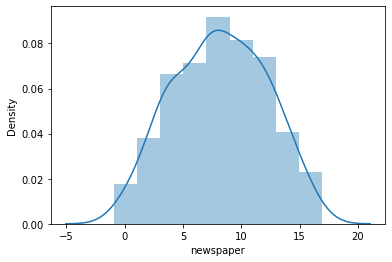

In [112]:
sns.distplot(X['newspaper'])

Hence the skewness of "newspaper"  is removed and brought within the skewness threshold range.

### Scaling the independant variable (X) to get all the columns in a standard scale

In [113]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(X)
x1

array([[ 9.78697339e-01,  9.89521352e-01,  1.63669060e+00],
       [-1.19901165e+00,  1.09070498e+00,  8.24807889e-01],
       [-1.51933199e+00,  1.53591293e+00,  1.63973373e+00],
       [ 5.64563564e-02,  1.22561648e+00,  1.29728802e+00],
       [ 4.00243389e-01, -8.31783915e-01,  1.29397566e+00],
       [-1.61906543e+00,  1.73828018e+00,  1.80970327e+00],
       [-1.04647815e+00,  6.52242599e-01, -1.21277595e-01],
       [-3.10797368e-01, -2.38173309e-01, -8.51517342e-01],
       [-1.62023876e+00, -1.41864895e+00, -2.07003868e+00],
       [ 6.23176960e-01, -1.38492107e+00, -2.44520695e-01],
       [-9.45571378e-01, -1.16906267e+00, -8.49785485e-02],
       [ 7.98003813e-01,  5.86319933e-02, -1.56356175e+00],
       [-1.44189191e+00,  8.07390825e-01,  1.53500409e+00],
       [-5.77144318e-01, -1.04764232e+00, -1.21749539e+00],
       [ 6.73630347e-01,  6.58988174e-01,  8.58578063e-01],
       [ 5.71550238e-01,  1.65733328e+00,  1.10721196e+00],
       [ 1.58061798e+00,  1.11094170e+00

since the different columns were out of scale we performed scaling operation on all the independant variables columns to bring it into the same scale.

We used Standard Scaler method to ensure all my independant variables columns have standardized scale.

### reassigning column names

In [114]:
X.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [115]:
x = pd.DataFrame(x1,columns=X.columns)

In [116]:
x

,TV,radio,newspaper
0,0.978697,0.989521,1.636691
1,-1.199012,1.090705,0.824808
2,-1.519332,1.535913,1.639734
3,0.056456,1.225616,1.297288
4,0.400243,-0.831784,1.293976
...,...,...,...
193,-1.272932,-1.310720,-0.695037
194,-0.615864,-1.229773,-1.135057
195,0.355657,-0.932968,-1.295219
196,1.606431,1.272836,1.544352


now the data is ready for Machine learing

# Machine Learning

### Since the y (Target) has continuous values we will use Linear Regression model

## Finding Best Random State

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
lr = LinearRegression()

In [120]:
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is : {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is :  {r2_score(y_test,pred_test)}")
    print("\n")

At random state 1, the training accuracy is : 0.8945018460466634
At random state 1, the testing accuracy is :  0.8915808201402338


At random state 2, the training accuracy is : 0.9104895320853252
At random state 2, the testing accuracy is :  0.8385093780102322


At random state 3, the training accuracy is : 0.8945008732306111
At random state 3, the testing accuracy is :  0.8977495614063602


At random state 4, the training accuracy is : 0.8980063011610756
At random state 4, the testing accuracy is :  0.8726744168845626


At random state 5, the training accuracy is : 0.8993019881675023
At random state 5, the testing accuracy is :  0.8622409600064913


At random state 6, the training accuracy is : 0.8991574664390982
At random state 6, the testing accuracy is :  0.8766949131606818


At random state 7, the training accuracy is : 0.890944609101688
At random state 7, the testing accuracy is :  0.9063807263429215


At random state 8, the training accuracy is : 0.9023892159093364
At random st

At random state 89, the training accuracy is : 0.9032240895674261
At random state 89, the testing accuracy is :  0.8457607864614859


At random state 90, the training accuracy is : 0.8793112686032555
At random state 90, the testing accuracy is :  0.9468304700964036


At random state 91, the training accuracy is : 0.8927178994151133
At random state 91, the testing accuracy is :  0.8977596185481717


At random state 92, the training accuracy is : 0.893765716936519
At random state 92, the testing accuracy is :  0.8934151292076533


At random state 93, the training accuracy is : 0.9081892173335392
At random state 93, the testing accuracy is :  0.8443176859670056


At random state 94, the training accuracy is : 0.9033986835736001
At random state 94, the testing accuracy is :  0.8683982189350958


At random state 95, the training accuracy is : 0.9081649716354206
At random state 95, the testing accuracy is :  0.8477779307074431


At random state 96, the training accuracy is : 0.90278362095675

At random state 184, the training accuracy is : 0.8981877416646378
At random state 184, the testing accuracy is :  0.8727187302970514


At random state 185, the training accuracy is : 0.8939168218246816
At random state 185, the testing accuracy is :  0.898887621543238


At random state 186, the training accuracy is : 0.8935882223859047
At random state 186, the testing accuracy is :  0.8988275748226298


At random state 187, the training accuracy is : 0.8851708934466431
At random state 187, the testing accuracy is :  0.9184471633776827


At random state 188, the training accuracy is : 0.8876927921526457
At random state 188, the testing accuracy is :  0.9197684536464902


At random state 189, the training accuracy is : 0.8920994241185314
At random state 189, the testing accuracy is :  0.8903656519484899


At random state 190, the training accuracy is : 0.8956216017632428
At random state 190, the testing accuracy is :  0.8929189526974003


At random state 191, the training accuracy is : 0

Hence we chose random state 63 since both training and testing accuracy is close by and higher in value compared to others

In [121]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=63)

In [122]:
lr.fit(x_train,y_train)

LinearRegression()

In [123]:
pred_test = lr.predict(x_test)

In [124]:
print(r2_score(y_test,pred_test))

0.8964376150854272


We will draw the linear regression plot to see the best fit line

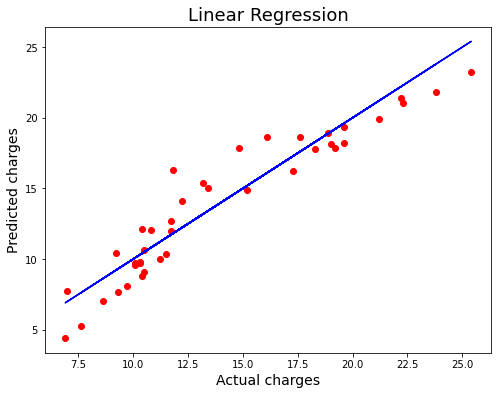

In [125]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual charges', fontsize=14)
plt.ylabel('Predicted charges', fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

The best fit line seems to be covering most of the points

In [126]:
# importing all the required libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [127]:
# creating a function to run all the regressors

def regressor(model, x, y):
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=63)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Root Mean Square Error (RMSE)
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("Root Mean Square Error is:", rmse)
    
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score is:", cv_score)
    
    # Result of r2 score - cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

### Linear Regression

In [128]:
model=LinearRegression()
regressor(model, x, y)

Root Mean Square Error is: 1.5984812462271463
R2 Score is: 89.64376150854272
Cross Validation Score is: 88.57406146589943
R2 Score - Cross Validation Score is 1.0697000426432908


### L1 -- Lasso Regression

In [129]:
model=Lasso(alpha=0.0001)
regressor(model, x, y)

Root Mean Square Error is: 1.5984597228308777
R2 Score is: 89.64404039817595
Cross Validation Score is: 88.57431267663263
R2 Score - Cross Validation Score is 1.069727721543316


### L2 -- Ridge Regression

In [130]:
model=Ridge(alpha=0.0001)
regressor(model, x, y)

Root Mean Square Error is: 1.5984808179278613
R2 Score is: 89.64376705827183
Cross Validation Score is: 88.57406269434074
R2 Score - Cross Validation Score is 1.0697043639310948


### Elastic Net

In [131]:
model=ElasticNet(alpha=0.0001)
regressor(model, x, y)

Root Mean Square Error is: 1.5984365118532644
R2 Score is: 89.64434115045371
Cross Validation Score is: 88.5742882768978
R2 Score - Cross Validation Score is 1.070052873555909


### Support Vector Regression

In [132]:
model=SVR(kernel='rbf')
regressor(model, x, y)

Root Mean Square Error is: 0.8527392305540468
R2 Score is: 97.05273328795187
Cross Validation Score is: 90.41170072126675
R2 Score - Cross Validation Score is 6.641032566685112


In [133]:
model=SVR(kernel='poly')
regressor(model, x, y)

Root Mean Square Error is: 2.30554841903017
R2 Score is: 78.45554824593879
Cross Validation Score is: 78.01024162630348
R2 Score - Cross Validation Score is 0.4453066196353035


In [134]:
model=SVR(kernel='linear')
regressor(model, x, y)

Root Mean Square Error is: 1.474829809298987
R2 Score is: 91.18401654718471
Cross Validation Score is: 87.63382119898789
R2 Score - Cross Validation Score is 3.550195348196823


### Decision Tree Regressor

In [135]:
model=DecisionTreeRegressor(random_state=63)
regressor(model, x, y)

Root Mean Square Error is: 1.0860478810807563
R2 Score is: 95.21937258571602
Cross Validation Score is: 95.40282300123675
R2 Score - Cross Validation Score is -0.18345041552073837


### Random Forest Regressor

In [136]:
model=RandomForestRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.6729068100413297
R2 Score is: 98.16474337945674
Cross Validation Score is: 97.56902974029373
R2 Score - Cross Validation Score is 0.5957136391630087


### K Neighbors Regressor

In [137]:
model=KNeighborsRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.9709119424541032
R2 Score is: 96.17926744839079
Cross Validation Score is: 93.58043941034188
R2 Score - Cross Validation Score is 2.5988280380489073


### SGD Regressor

In [139]:
model=SGDRegressor()
regressor(model, x, y)

Root Mean Square Error is: 1.60186020143916
R2 Score is: 89.59993209055041
Cross Validation Score is: 88.63677450564674
R2 Score - Cross Validation Score is 0.9631575849036693


### Gradient Boosting Regressor

In [140]:
model=GradientBoostingRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.6369932057410841
R2 Score is: 98.35541413741242
Cross Validation Score is: 97.81901061403889
R2 Score - Cross Validation Score is 0.5364035233735365


### Ada Boost Regressor

In [147]:
model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=63)
regressor(model, x, y)

Root Mean Square Error is: 0.9971568855131763
R2 Score is: 95.96991749435001
Cross Validation Score is: 96.04497890846956
R2 Score - Cross Validation Score is -0.07506141411954559


### Extra Trees Regressor

In [144]:
model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
regressor(model, x, y)

Root Mean Square Error is: 0.8078334721649093
R2 Score is: 97.35496976769925
Cross Validation Score is: 93.86085582692193
R2 Score - Cross Validation Score is 3.4941139407773107


Comparing all the above the Gradient Boosting Regressor gives the best results since the R2 Score - Cross Validation Score are closest and the highest amount all the models.

## Hyper parameter tuning

In [162]:
 GradientBoostingRegressor?

In [157]:
# creating parameters list to pass into GridSearchCV

parameters = {'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
              'learning_rate': [0.1 , 0.5 , 1, 1.5],
              'criterion': ['friedman_mse', 'squared_error', 'mse'],
              'max_depth' : [3 , 4 ,5 ],
              'max_features' : ['auto', 'sqrt', 'log2']}

In [158]:
GCV = GridSearchCV(GradientBoostingRegressor(), parameters, cv=5)

In [159]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': [0.1, 0.5, 1, 1.5],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_depth': [3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [160]:
GCV.best_params_      # printing best parameters found by GridSearchCV

{'criterion': 'mse',
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': 'auto'}

We got the best parameters using Gridsearch CV

In [163]:
final_model = GradientBoostingRegressor(criterion= 'mse', learning_rate= 0.1, loss= 'squared_error', max_depth = 3, max_features = 'auto')

In [164]:
final_fit = final_model.fit(x_train,y_train)   # final fit

In [166]:
final_pred = final_model.predict(x_test)   # predicting with best parameters

In [167]:
best_r2=r2_score(y_test,final_pred,multioutput='variance_weighted')*100   # checking final r2_score
print("R2 score for the Best Model is:", best_r2)

R2 score for the Best Model is: 98.36678963581484


We used Hyper Parameter Tuning on the final model to obtained the best r2_score.

# Saving the model in pickle Format

In [168]:
# pickeling or serialization of a file
import pickle
filename = 'Advertising_Sales_Channel_Prediction.pkl'
pickle.dump(final_model, open(filename, 'wb'))

Saving the best regression model using pickle

# Prediction Conclusion:

In [169]:
import numpy as np
a=np.array(y_test)
predicted=np.array(final_model.predict(x_test))
df_comparison = pd.DataFrame({"original":a,"predicted":predicted},index= range(len(a)))
df_comparison

,original,predicted
0,13.2,12.869453
1,12.2,12.010562
2,19.0,18.895334
3,10.8,10.869959
4,11.7,11.455853
5,6.9,7.286841
6,7.0,7.723588
7,19.6,19.578027
8,11.5,12.164258
9,13.4,12.500393


Hence predicting the total sales generated from all the sales channel for different independant variables.

In [170]:
df_comparison.to_csv('Advertising_Sales_Channel_Prediction.csv')

Saving the predicted values in a csv file